In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target
# print(x.shape)
# print(y.shape)

x = x[y < 2, :2]
y = y[y < 2]
# print(x.shape)

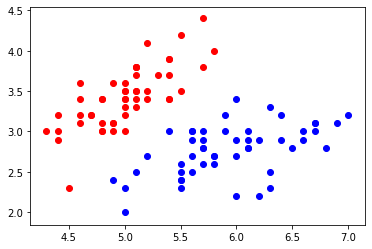

In [12]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], color = 'red')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color = 'blue')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
stdScaler.fit(x)
x_std = stdScaler.transform(x)

In [16]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C = 1e9)
svc.fit(x_std, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [19]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1), 
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_map = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, cmap = custom_map)

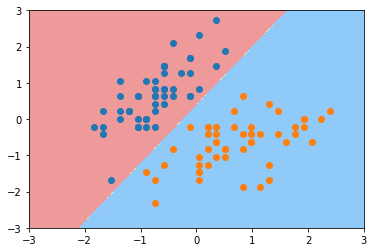

In [22]:
plot_decision_boundary(svc, axis = [-3, 3, -3, 3])
plt.scatter(x_std[y==0, 0], x_std[y==0, 1])
plt.scatter(x_std[y==1, 0], x_std[y==1, 1])
plt.show()

In [24]:
svc2 = LinearSVC(C = 0.01)
# print(1e9)
svc2.fit(x_std, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

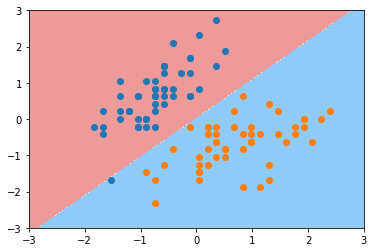

In [26]:
plot_decision_boundary(svc2, axis = [-3, 3, -3, 3])
plt.scatter(x_std[y==0, 0], x_std[y==0, 1])
plt.scatter(x_std[y==1, 0], x_std[y==1, 1])
plt.show()

In [31]:
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1), 
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_map = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, cmap = custom_map)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    
    plt.plot(plot_x[up_index], up_y[up_index], color = 'black')
    plt.plot(plot_x[down_index], down_y[down_index], color = 'black')

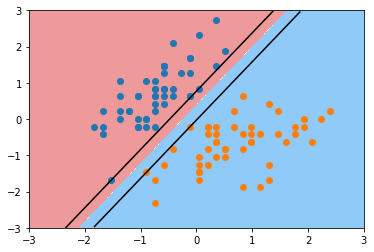

In [33]:
plot_svc_decision_boundary(svc, axis = [-3, 3, -3, 3])
plt.scatter(x_std[y==0, 0], x_std[y==0, 1])
plt.scatter(x_std[y==1, 0], x_std[y==1, 1])
plt.show()

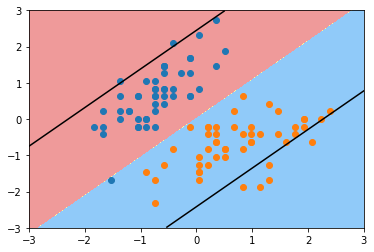

In [34]:
plot_svc_decision_boundary(svc2, axis = [-3, 3, -3, 3])
plt.scatter(x_std[y==0, 0], x_std[y==0, 1])
plt.scatter(x_std[y==1, 0], x_std[y==1, 1])
plt.show()

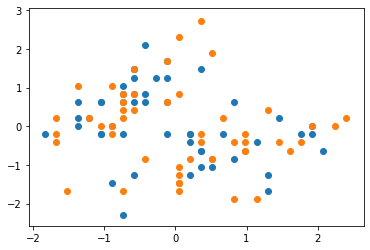

In [50]:
from sklearn import datasets
x, y = datasets.make_moons(noise = 0.15, random_state = 666 )
# print(x.shape)
plt.scatter(x_std[y==0, 0], x_std[y==0, 1])
plt.scatter(x_std[y==1, 0], x_std[y==1, 1])
plt.show()

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C = 1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree = degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C = C))
    ])


In [40]:
poly_svc = PolynomialSVC(degree = 3)
poly_svc.fit(x, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearSVC',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [41]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1), 
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_map = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, cmap = custom_map)

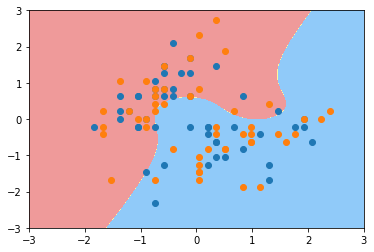

In [51]:
plot_decision_boundary(poly_svc, axis = [-3, 3, -3, 3])
plt.scatter(x_std[y==0, 0], x_std[y==0, 1])
plt.scatter(x_std[y==1, 0], x_std[y==1, 1])
plt.show()